# Data preprocessing & EDA

In [1]:
# Loading neccessary libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

import joblib

import missingno as mno
from sklearn import linear_model
%matplotlib inline

import sklearn

df = pd.read_csv("credit_sample.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148929 entries, 0 to 148928
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        148929 non-null  int64  
 1   obs_date  148929 non-null  object 
 2   Var_01    148557 non-null  float64
 3   Var_02    148929 non-null  float64
 4   Var_03    144582 non-null  float64
 5   Var_04    147705 non-null  float64
 6   Var_05    147521 non-null  float64
 7   Var_06    136644 non-null  float64
 8   Var_07    148929 non-null  float64
 9   Var_08    148929 non-null  float64
 10  Var_09    148929 non-null  float64
 11  Var_10    148882 non-null  float64
 12  Var_11    148914 non-null  float64
 13  Var_12    148868 non-null  float64
 14  Var_13    148751 non-null  float64
 15  Var_14    148929 non-null  float64
 16  Var_15    148929 non-null  float64
 17  Var_16    148557 non-null  float64
 18  Var_17    146789 non-null  float64
 19  Var_18    148929 non-null  float64
 20  Var_

In [2]:
df['year'] = pd.DatetimeIndex(df['obs_date']).year
df = pd.get_dummies(df, columns = ['year'], drop_first = True) 
df

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_37,Var_38,Var_39,default,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
0,16680574,2015-03-31,1.113874e+07,1.376687e+07,5.088808e+04,1.381694,1.480514,7.173578e+05,0.080700,1.261532e+06,...,3.229780,2.983519e+06,3.077087e+06,0,0,0,0,0,0,0
1,96135545,2015-12-31,3.162025e+10,5.264251e+10,1.191007e+10,1.349057,-0.240472,1.696850e+09,0.463526,2.699133e+10,...,-0.393707,2.825408e+09,8.181468e+09,1,0,0,0,0,0,0
2,96135545,2017-12-31,4.362366e+10,7.431924e+10,1.368830e+10,1.276777,-0.250091,2.310428e+09,0.466883,3.555459e+10,...,-0.329019,4.073381e+09,9.456634e+09,0,0,1,0,0,0,0
3,96135545,2021-12-31,7.415145e+10,1.685034e+11,1.514736e+10,0.860113,0.112167,5.219493e+09,0.459297,5.080364e+10,...,0.141644,7.684133e+09,-1.205984e+10,0,0,0,0,0,0,1
4,96135545,2018-12-31,4.217623e+10,7.909355e+10,1.116617e+10,1.090521,-0.208307,2.802609e+09,0.457592,3.373699e+10,...,-0.295527,4.824058e+09,3.500941e+09,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148924,50036390,2020-12-31,9.856401e+04,1.013964e+05,1.014642e+04,6.425659,0.362302,8.737854e+02,0.131924,6.657380e+04,...,0.352098,4.125691e+03,8.322488e+04,0,0,0,0,0,1,0
148925,15853756,2017-12-31,3.476749e+04,4.989166e+04,2.676141e+04,1.279394,-2.894691,-3.668688e+01,0.215534,6.679014e+04,...,-0.400899,2.377143e+03,7.592517e+03,0,0,1,0,0,0,0
148926,15853756,2016-12-31,9.395386e+03,1.316894e+04,8.052164e+03,0.646936,0.367477,4.352037e+02,0.076480,2.009101e+04,...,-0.392287,0.000000e+00,-5.127524e+03,0,1,0,0,0,0,0
148927,91988808,2021-06-30,7.853617e+04,3.431528e+06,1.570044e+04,1.323897,-120.526693,NaN,-0.014040,-1.590527e+03,...,-2120.263607,3.529997e+04,1.921420e+04,0,0,0,0,0,0,1


### Missing values

In [3]:
# We have some missing data.
df.isnull().values.any()

# No. of rows with at least one missing value
df.isna().any(axis=1).sum()

# No. of missings in total across different columns
df.isna().sum()

ID               0
obs_date         0
Var_01         372
Var_02           0
Var_03        4347
Var_04        1224
Var_05        1408
Var_06       12285
Var_07           0
Var_08           0
Var_09           0
Var_10          47
Var_11          15
Var_12          61
Var_13         178
Var_14           0
Var_15           0
Var_16         372
Var_17        2140
Var_18           0
Var_19          15
Var_20       14299
Var_21        1039
Var_22           0
Var_23           0
Var_24           0
Var_25        1224
Var_26        4489
Var_27          54
Var_28        7816
Var_29           0
Var_30          19
Var_31          42
Var_32        1290
Var_33        1326
Var_34          47
Var_35         647
Var_36        1288
Var_37        1324
Var_38       13081
Var_39         283
default          0
year_2016        0
year_2017        0
year_2018        0
year_2019        0
year_2020        0
year_2021        0
dtype: int64

Index(['Var_03', 'Var_06', 'Var_17', 'Var_20', 'Var_26', 'Var_28', 'Var_38'], dtype='object')

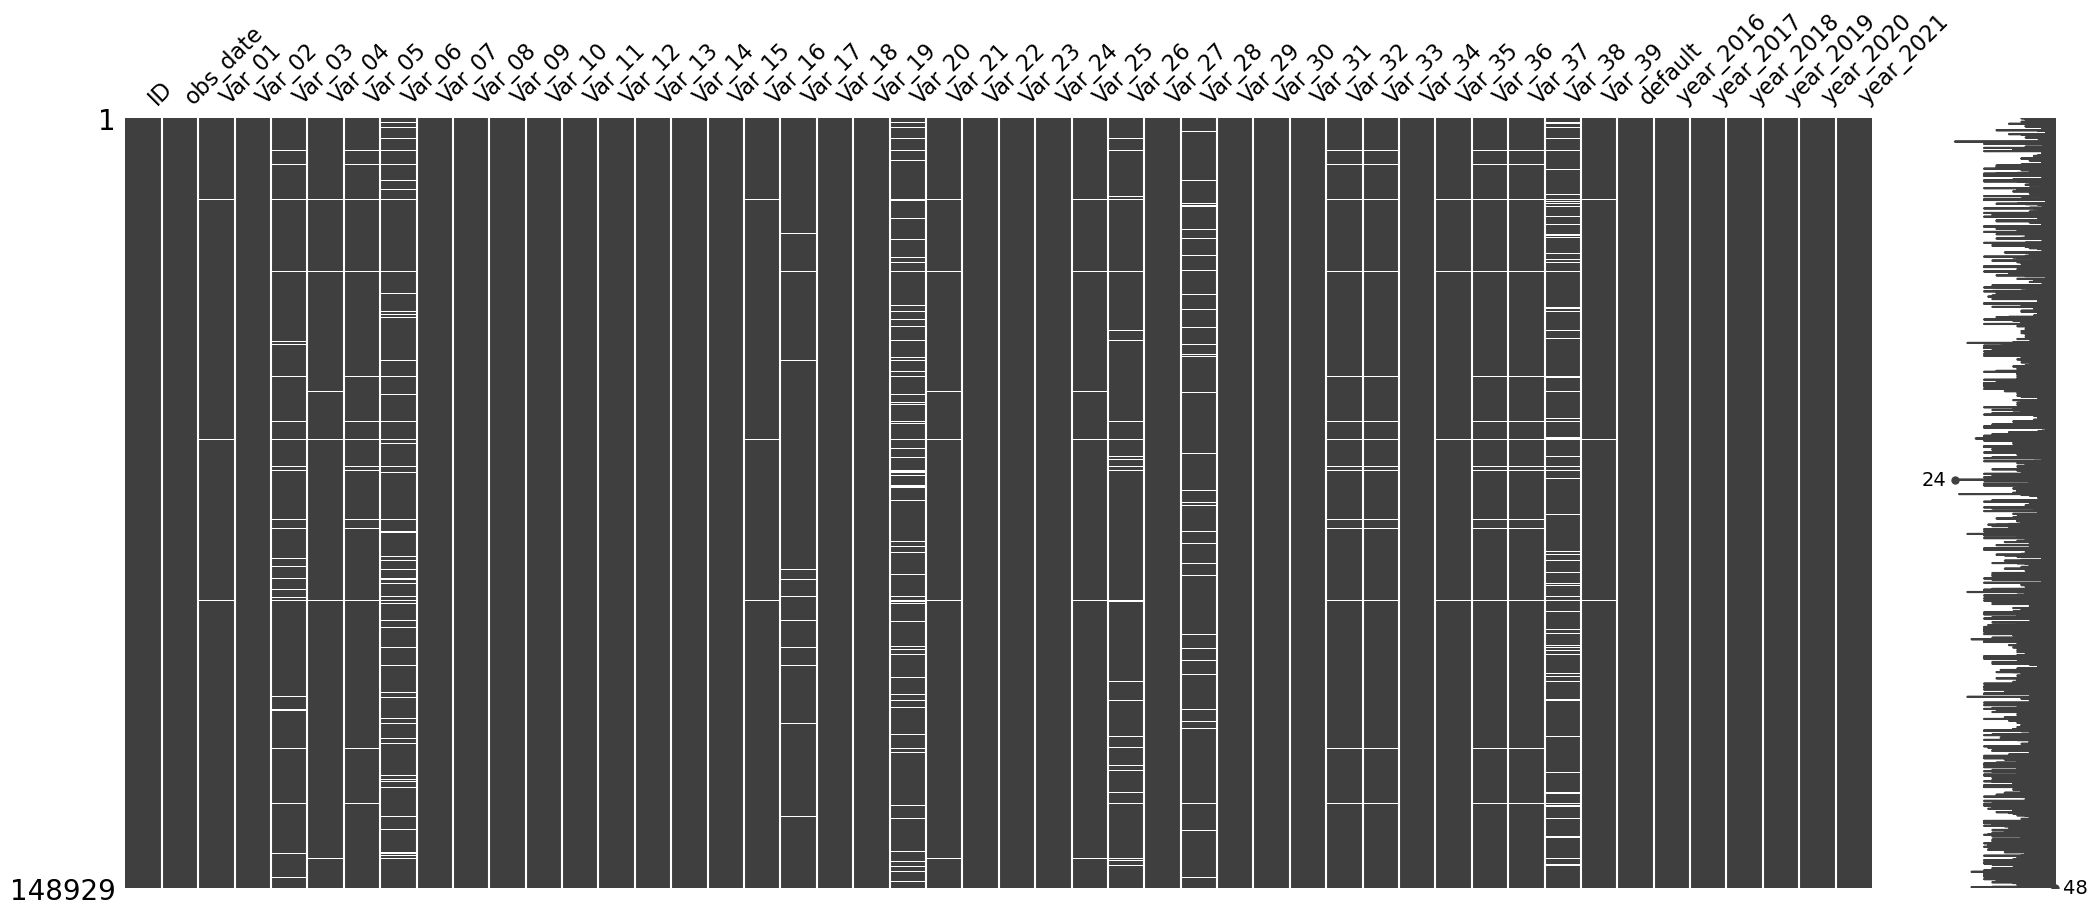

In [4]:
mno.matrix(df)

# Let's focus on variables where the number of missing values is higher than 1500 (around 1% of the entire dataset)
df.columns[df.isna().sum() > 1500]

In [5]:
# Let's see if some variables are redundant by checking their corellations with others.

# Variables with high correlations

corr = df.iloc[:, 2:41].corr()  
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

C:\Users\monik\AppData\Local\Temp\ipykernel_3008\1151809631.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,Var_09,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39
Var_01,1.000,0.995,0.994,-0.000,-0.000,0.686,-0.000,0.995,0.995,0.987,0.995,0.989,0.000,0.995,0.000,1.000,0.988,0.995,0.995,0.990,0.998,0.950,0.000,0.994,-0.000,0.998,-0.000,0.000,0.996,0.996,-0.000,0.995,0.000,0.987,-0.000,0.995,0.000,0.983,0.633
Var_02,0.995,1.000,0.989,-0.000,-0.000,0.882,-0.000,0.992,0.993,0.997,1.000,0.998,0.000,0.989,0.000,0.995,0.999,1.000,1.000,0.995,0.996,0.955,0.000,0.989,-0.000,0.993,-0.000,0.000,0.992,0.992,-0.000,0.998,0.000,0.997,-0.000,0.998,0.000,0.980,0.591
Var_03,0.994,0.989,1.000,-0.000,-0.000,0.800,-0.000,0.987,0.989,0.983,0.989,0.984,0.000,0.989,0.000,0.994,0.983,0.989,0.989,0.984,0.988,0.945,0.000,0.986,-0.000,0.990,-0.000,0.000,0.988,0.988,-0.000,0.986,0.000,0.983,-0.000,0.986,0.000,0.972,0.688
Var_04,-0.000,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Var_05,-0.000,-0.000,-0.000,-0.000,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.834,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.296,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
Var_06,0.686,0.882,0.800,-0.000,0.000,1.000,-0.000,0.833,0.939,0.867,0.881,0.877,0.000,0.844,0.000,0.686,0.853,0.882,0.881,0.780,0.761,0.578,-0.000,0.696,-0.000,0.693,-0.000,0.000,0.860,0.860,-0.000,0.686,0.000,0.867,-0.000,0.687,0.000,0.800,0.367
Var_07,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.001,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.151,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
Var_08,0.995,0.992,0.987,-0.000,-0.000,0.833,-0.000,1.000,0.999,0.987,0.992,0.989,0.000,0.998,0.000,0.995,0.986,0.992,0.992,0.995,0.996,0.959,0.000,0.999,-0.000,0.994,-0.000,0.000,0.995,0.995,-0.000,0.995,0.000,0.987,-0.000,0.995,0.000,0.976,0.586
Var_09,0.995,0.993,0.989,-0.000,-0.000,0.939,-0.000,0.999,1.000,0.990,0.993,0.991,0.000,0.999,0.000,0.995,0.988,0.993,0.993,0.995,0.996,0.958,0.000,0.999,-0.000,0.993,-0.000,0.000,0.994,0.994,-0.000,0.995,0.000,0.990,-0.000,0.995,0.000,0.976,0.591
Var_10,0.987,0.997,0.983,-0.000,-0.000,0.867,-0.000,0.987,0.990,1.000,0.997,1.000,0.000,0.985,0.000,0.987,0.998,0.997,0.997,0.994,0.990,0.955,0.000,0.984,-0.000,0.982,-0.000,0.000,0.984,0.984,-0.000,0.992,0.000,1.000,-0.000,0.992,0.000,0.964,0.570


In [6]:
# Should we fill possible NaNs with mean or median values? Distributions seem scewed for most variables, so we will go with means

df.describe()

,ID,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,Var_09,...,Var_37,Var_38,Var_39,default,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
count,1.489290e+05,1.485570e+05,1.489290e+05,1.445820e+05,1.477050e+05,1.475210e+05,1.366440e+05,1.489290e+05,1.489290e+05,1.489290e+05,...,1.476050e+05,1.358480e+05,1.486460e+05,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000
mean,5.028663e+07,1.556308e+11,4.900502e+11,3.428247e+10,3.436859e+02,2.224081e+03,6.514789e+09,2.553079e+03,4.193919e+10,4.791658e+10,...,-1.207070e+03,4.303311e+10,1.833147e+10,0.058746,0.167832,0.175607,0.160237,0.145432,0.128497,0.067341
std,2.895823e+07,2.167389e+13,6.493138e+13,4.027770e+12,9.355119e+04,1.993117e+06,2.374605e+11,5.455705e+05,6.995841e+12,7.008466e+12,...,5.225772e+05,6.302952e+12,1.561442e+12,0.235150,0.373718,0.380487,0.366827,0.352537,0.334644,0.250612
min,1.574000e+03,-3.814283e+07,-3.812235e+07,-1.699122e+09,-2.603805e+06,-6.970251e+08,-8.687891e+10,-4.829990e+05,-1.986356e+13,-1.615293e+13,...,-2.003140e+08,-2.120511e+08,-5.150561e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516479e+07,4.223813e+05,1.370800e+06,4.608156e+04,9.761260e-01,-9.187846e-02,3.203281e+04,5.174170e-02,6.843008e+04,1.282852e+05,...,-2.285184e-01,7.289401e+04,-9.510570e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.057543e+07,4.001836e+06,9.914237e+06,4.244404e+05,1.400867e+00,2.489169e-01,2.161358e+05,1.231002e-01,3.461714e+05,6.763384e+05,...,1.242122e+00,9.049906e+05,3.253431e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.542374e+07,1.587616e+08,4.375026e+08,1.732421e+07,2.296006e+00,8.945592e-01,8.795017e+06,2.756833e-01,1.186483e+07,2.415029e+07,...,4.278571e+00,4.107307e+07,1.162980e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999212e+07,5.995097e+15,1.804891e+16,1.030497e+15,2.827785e+07,1.549138e+08,3.520633e+13,1.633219e+08,1.924511e+15,1.924511e+15,...,1.057213e+07,1.878501e+15,4.601985e+14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Handling missing values:
# - deleted variables which had high correlations with other variables (over 0.99 in some/most cases) and had ofer 1500 missing values: 03, 17, 20, 26, 38 
# - filling NaN in rest of variables excpet Var_06 and Var_28 with median values
# - Var_06 and Var_28 weren't directly correlated with other variables and they had a relatively high
# number of missings. Here we predicted missing values with Linear Regression

df = df.loc[:, ~df.columns.isin(['Var_03', 'Var_17', 'Var_20', 'Var_26', 'Var_38'])]

# Due to lack of time to properly investigate and handle missing values further, I decided to fill them in. I chose to fill them
# with median from each column, as distribution of variables was mostly highly scewed.

df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])] = df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])].fillna(df.median())

# We also fill selected variables from Var_06 and Var_28 with median
df[(df['Var_06'].isnull()) & (df['Var_28'].isnull())] = df[(df['Var_06'].isnull()) & (df['Var_28'].isnull())].fillna(df.median())

C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2772752144.py:12: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])] = df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])].fillna(df.median())
C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2772752144.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])] = df.loc[:, ~df.columns.isin(['Var_06', 'Var_28'])].fillna(df.median())
C:\Users\monik\AppData\Local\Temp\ipykernel_3008\277

In [8]:
# A little bit around but working so it's okay :D

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

data = df.iloc[:, 2:37]

data_with_null = data
data_without_null = data_with_null.dropna()

# Procedure for Var_06

train_data_x = data_without_null.iloc[:,:4]
train_data_y = data_without_null.iloc[:,4]

# Training with the available data
linreg.fit(train_data_x, train_data_y)

# Predict for the whole dataset and replace only the missing values Later
test_data = data_with_null.iloc[:, :4]
data['Var_06_predicted'] = pd.DataFrame(linreg.predict(test_data))

# Lets replace only the missing values
data_with_null.Var_06.fillna(data.Var_06_predicted, inplace=True)


# Procedure for Var_28

data = data_with_null
data_with_null = data
data_without_null = data_with_null.dropna()

train_data_x = data_without_null.iloc[:, :23]
train_data_y = data_without_null.iloc[:, 23]

# Training with the available data
linreg.fit(train_data_x, train_data_y)

# Predict for the whole dataset and replace only the missing values Later
test_data = data_with_null.iloc[:, :23]
data['Var_28_predicted'] = pd.DataFrame(linreg.predict(test_data))

# Lets replace only the missing values
data_with_null.Var_28.fillna(data.Var_28_predicted, inplace=True)

In [9]:
df['Var_28'] = data['Var_28_predicted']
df['Var_06'] = data['Var_06_predicted']

# Checking if there are missings left
# df.isna().sum()

C:\Users\monik\AppData\Local\Temp\ipykernel_3008\1463370342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Var_28'] = data['Var_28_predicted']
C:\Users\monik\AppData\Local\Temp\ipykernel_3008\1463370342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Var_06'] = data['Var_06_predicted']


We see that our data is unbalanced in terms of target variable. Taking that into account, and the fact that our main concern is "to limit potential losses on loans to companies", we will optimize our model in terms of F1 score. F1 score is a performance measure calculated as harmonic mean of precision and recall. It is good for unbalanced dasets when more attention is needed on the positives. 

### Outliers detection

In [10]:
df.describe()

,ID,Var_01,Var_02,Var_04,Var_05,Var_06,Var_07,Var_08,Var_09,Var_10,...,Var_36,Var_37,Var_39,default,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
count,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,1.489290e+05,...,1.489290e+05,1.489290e+05,1.489290e+05,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000
mean,5.028663e+07,1.552421e+11,4.900502e+11,3.408728e+02,2.203056e+03,1.485876e+10,2.553079e+03,4.193919e+10,4.791658e+10,2.248449e+11,...,1.397653e+11,-1.196328e+03,1.829664e+10,0.058746,0.167832,0.175607,0.160237,0.145432,0.128497,0.067341
std,2.895823e+07,2.164681e+13,6.493138e+13,9.316596e+04,1.983673e+06,1.757125e+12,5.455705e+05,6.995841e+12,7.008466e+12,3.000517e+13,...,2.177496e+13,5.202492e+05,1.559958e+12,0.235150,0.373718,0.380487,0.366827,0.352537,0.334644,0.250612
min,1.574000e+03,-3.814283e+07,-3.812235e+07,-2.603805e+06,-6.970251e+08,-1.653560e+09,-4.829990e+05,-1.986356e+13,-1.615293e+13,-5.898511e+13,...,-6.700936e+13,-2.003140e+08,-5.150561e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516479e+07,4.247602e+05,1.370800e+06,9.804216e-01,-8.788120e-02,1.658076e+09,5.174170e-02,6.843008e+04,1.282852e+05,1.863064e+05,...,-2.193882e+04,-2.184881e-01,-8.973339e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.057543e+07,4.001836e+06,9.914237e+06,1.400867e+00,2.489169e-01,1.658321e+09,1.231002e-01,3.461714e+05,6.763384e+05,1.750979e+06,...,7.997494e+05,1.242122e+00,3.253431e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.542374e+07,1.572908e+08,4.375026e+08,2.281925e+00,8.844081e-01,1.670444e+09,2.756833e-01,1.186483e+07,2.415029e+07,5.895820e+07,...,3.835776e+07,4.237843e+00,1.149586e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999212e+07,5.995097e+15,1.804891e+16,2.827785e+07,1.549138e+08,4.884884e+14,1.633219e+08,1.924511e+15,1.924511e+15,8.136709e+15,...,6.043234e+15,1.057213e+07,4.601985e+14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
pom = df.iloc[:, 2:37]

for col in pom.columns:
    percentiles = df[col].quantile([0.05, 0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2288037473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2288037473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2288037473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [12]:
df.describe()

,ID,Var_01,Var_02,Var_04,Var_05,Var_06,Var_07,Var_08,Var_09,Var_10,...,Var_36,Var_37,Var_39,default,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
count,1.489290e+05,1.489290e+05,1.489290e+05,148929.000000,148929.000000,1.489290e+05,148929.000000,1.489290e+05,1.489290e+05,1.489290e+05,...,1.489290e+05,148929.000000,1.489290e+05,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000,148929.000000
mean,5.028663e+07,7.754319e+08,2.149815e+09,2.010443,0.601657,1.717553e+09,0.202544,9.810257e+07,1.655935e+08,4.418904e+08,...,3.751259e+08,2.706327,9.702096e+07,0.058746,0.167832,0.175607,0.160237,0.145432,0.128497,0.067341
std,2.895823e+07,2.158334e+09,5.991932e+09,1.756714,1.309517,1.656092e+08,0.214763,2.870103e+08,4.739875e+08,1.282034e+09,...,1.087216e+09,5.122378,3.162801e+08,0.235150,0.373718,0.380487,0.366827,0.352537,0.334644,0.250612
min,1.574000e+03,3.833930e+04,1.048054e+05,0.356834,-1.255305,1.658041e+09,-0.009545,-2.971033e+06,-8.666212e+04,-1.320966e+07,...,-3.188503e+07,-4.779690,-1.558717e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516479e+07,4.247602e+05,1.370800e+06,0.980422,-0.087881,1.658076e+09,0.051742,6.843008e+04,1.282852e+05,1.863064e+05,...,-2.193882e+04,-0.218488,-8.973339e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.057543e+07,4.001836e+06,9.914237e+06,1.400867,0.248917,1.658321e+09,0.123100,3.461714e+05,6.763384e+05,1.750979e+06,...,7.997494e+05,1.242122,3.253431e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.542374e+07,1.572908e+08,4.375026e+08,2.281925,0.884408,1.670444e+09,0.275683,1.186483e+07,2.415029e+07,5.895820e+07,...,3.835776e+07,4.237843,1.149586e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999212e+07,8.986955e+09,2.494962e+10,7.500657,4.555085,2.347735e+09,0.775584,1.202984e+09,1.978732e+09,5.380216e+09,...,4.523409e+09,17.401256,1.292525e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting samples into testing and training data, standarization

In [13]:
df.default.value_counts(normalize = True)

0    0.941254
1    0.058746
Name: default, dtype: float64

In [14]:
# Splitting the dataset into target and explonatory variables

X = df.loc[:, ~df.columns.isin(['default', 'ID', 'obs_date'])]
Y = df['default']

In [15]:
# Splitting the data into training and testing samples so that proportion of positive and negatives are rouhly the same in each sample.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 12345)

In [16]:
print(Y_train.value_counts(normalize = True))
print(Y_test.value_counts(normalize = True))

0    0.941257
1    0.058743
Name: default, dtype: float64
0    0.941248
1    0.058752
Name: default, dtype: float64


In [17]:
from sklearn import preprocessing

num_cols = X_train.loc[:, ~X_train.columns.isin(['year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021'])].columns

std_scale = preprocessing.StandardScaler().fit(X_train[num_cols])

X_train[num_cols] = std_scale.transform(X_train[num_cols])
X_test[num_cols]  = std_scale.transform(X_test[num_cols])

### SMOTE - rebalancing training dataset

In [18]:
# Rebalancing training data using SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12345)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [19]:
# We see that we obtained a balanced dataset for training our model

print(Y_train.value_counts(normalize = True))

0    0.5
1    0.5
Name: default, dtype: float64


### Variables selection

In [20]:
# Even after tranformations, we see that some variables are still (lineary) highly correlated with each other.

# Due to that, some dimension reduction could be helpful before conducting the analysis. 

corr = X_train.iloc[:, 0:34].corr()  
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\monik\AppData\Local\Temp\ipykernel_3008\2575861717.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Var_01,Var_02,Var_04,Var_05,Var_06,Var_07,Var_08,Var_09,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_18,Var_19,Var_21,Var_22,Var_23,Var_24,Var_25,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_39
Var_01,1.00,0.95,-0.14,0.01,0.95,-0.08,0.84,0.87,0.83,0.95,0.89,0.02,0.89,-0.21,1.00,0.95,0.95,0.97,0.79,-0.07,0.81,-0.13,-0.13,0.13,0.93,0.93,-0.13,0.73,0.02,0.83,0.05,0.73,0.02,0.71
Var_02,0.95,1.00,-0.15,0.02,1.00,-0.01,0.85,0.91,0.86,1.00,0.94,-0.00,0.91,-0.14,0.95,1.00,1.00,0.94,0.79,-0.04,0.81,-0.14,-0.14,0.17,0.89,0.89,-0.20,0.80,0.05,0.86,0.02,0.80,0.05,0.63
Var_04,-0.14,-0.15,1.00,-0.17,-0.15,0.20,-0.13,-0.14,-0.08,-0.15,-0.11,-0.23,-0.16,0.14,-0.14,-0.15,-0.15,-0.20,-0.10,0.27,-0.11,0.94,0.21,0.08,-0.17,-0.17,-0.09,-0.19,-0.11,-0.08,-0.49,-0.19,-0.11,0.07
Var_05,0.01,0.02,-0.17,1.00,0.02,0.11,-0.02,-0.00,-0.06,0.02,-0.04,0.71,-0.02,0.07,0.01,0.02,0.02,0.03,-0.05,-0.05,-0.05,-0.17,-0.21,-0.18,-0.02,-0.02,-0.17,0.19,0.43,-0.06,0.46,0.19,0.43,-0.06
Var_06,0.95,1.00,-0.15,0.02,1.00,-0.02,0.86,0.91,0.86,1.00,0.94,0.00,0.91,-0.14,0.95,1.00,1.00,0.95,0.80,-0.05,0.82,-0.14,-0.14,0.16,0.90,0.90,-0.19,0.80,0.05,0.86,0.03,0.80,0.04,0.64
Var_07,-0.08,-0.01,0.20,0.11,-0.02,1.00,0.05,0.04,0.01,-0.01,0.00,-0.07,-0.04,0.64,-0.08,-0.01,-0.01,-0.08,0.04,0.63,0.04,0.26,0.21,-0.03,-0.13,-0.13,-0.42,0.04,0.21,0.01,-0.12,0.04,0.21,-0.07
Var_08,0.84,0.85,-0.13,-0.02,0.86,0.05,1.00,0.96,0.76,0.85,0.84,-0.04,0.90,-0.11,0.84,0.85,0.85,0.82,0.92,0.02,0.94,-0.13,-0.03,0.21,0.84,0.84,-0.14,0.68,-0.02,0.76,-0.01,0.68,-0.03,0.62
Var_09,0.87,0.91,-0.14,-0.00,0.91,0.04,0.96,1.00,0.79,0.91,0.88,-0.04,0.94,-0.11,0.87,0.91,0.91,0.86,0.88,-0.01,0.91,-0.14,-0.06,0.20,0.88,0.88,-0.16,0.73,-0.01,0.79,-0.00,0.73,-0.01,0.62
Var_10,0.83,0.86,-0.08,-0.06,0.86,0.01,0.76,0.79,1.00,0.86,0.92,-0.11,0.78,-0.14,0.83,0.86,0.86,0.79,0.75,0.02,0.76,-0.07,-0.11,0.22,0.77,0.77,-0.19,0.62,-0.01,1.00,-0.14,0.62,-0.01,0.65
Var_11,0.95,1.00,-0.15,0.02,1.00,-0.01,0.85,0.91,0.86,1.00,0.95,-0.00,0.91,-0.14,0.95,1.00,1.00,0.94,0.79,-0.04,0.81,-0.14,-0.14,0.17,0.89,0.89,-0.20,0.80,0.05,0.86,0.02,0.80,0.05,0.63


In [21]:
# Deleting redundant columns having correlation of almost 1 with other columns and similiar economically
reduntant_cols = ['Var_06', 'Var_11', 'Var_18', 'Var_19', 'Var_32', 'Var_10', 'Var_16']
X_train = X_train.loc[:, ~X_train.columns.isin(reduntant_cols)]
X_test = X_test.loc[:, ~X_test.columns.isin(reduntant_cols)]

In [22]:
X_train

,Var_01,Var_02,Var_04,Var_05,Var_07,Var_08,Var_09,Var_12,Var_13,Var_14,...,Var_35,Var_36,Var_37,Var_39,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
0,-0.359919,-0.359827,-0.519077,-1.420224,-0.840725,-0.342792,-0.350320,-0.351907,2.156692,-0.361354,...,1.269176,-0.346279,-1.463124,-0.306236,0,1,0,0,0,0
1,-0.359810,-0.359756,-0.271656,0.364426,-0.560726,-0.342550,-0.350126,-0.351874,1.002043,-0.361085,...,1.057202,-0.346099,-0.203779,-0.305894,0,0,0,0,0,0
2,-0.217876,-0.231607,-0.769675,0.663270,-0.370424,-0.335248,-0.343790,-0.302846,1.208356,-0.350170,...,1.111218,-0.194579,2.873948,-0.798206,0,0,1,0,0,0
3,0.363046,1.035941,-0.350239,0.097747,0.564932,-0.221011,0.283137,1.156664,-0.229243,0.409231,...,0.146584,2.574787,1.538821,1.087172,0,1,0,0,0,0
4,-0.358953,-0.359427,-0.187253,-0.583058,-0.822983,-0.342492,-0.349967,-0.351340,-0.396616,-0.359360,...,-0.256241,-0.346541,-0.899098,-0.303464,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196247,-0.307074,-0.319442,0.264833,-0.520465,-0.415773,-0.268762,-0.296486,-0.255936,-0.657825,-0.296388,...,-1.635233,-0.365400,-0.707904,-0.090054,0,0,0,0,0,0
196248,-0.111515,-0.131148,-0.242342,-0.124538,-0.007327,0.093482,-0.012528,-0.081308,-0.299535,0.096449,...,-0.000289,0.082445,0.021091,0.321388,0,0,0,0,0,0
196249,3.798601,3.787065,1.962566,-0.482174,-0.198611,3.834568,3.810960,3.815445,-0.676732,3.789393,...,-1.799474,-0.375488,-0.602469,3.773022,0,0,0,0,0,0
196250,0.806367,0.538750,-0.641836,-0.182559,-0.674159,0.961774,1.395529,0.567835,-0.148581,3.752837,...,0.266326,0.485853,-0.323627,-0.573044,0,0,0,0,0,0


## Logit

In [43]:
metrics = ['f1', 'roc_auc', 'accuracy']

In [44]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [45]:
# As a benchmark for our model we choosed simple logistic regression

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

cv_5 = RepeatedKFold(n_splits = 5, random_state = 12345, n_repeats = 3)
logistic = LogisticRegression(max_iter = 1000)
logistic_scores = cross_validate(logistic, X_train, Y_train, scoring = metrics, cv = cv_5)

logistic_fitted = logistic.fit(X_train, Y_train)

In [31]:
for metric in logistic_scores:
    print(metric, logistic_scores[metric].mean())

fit_time 0.9099996407826741
score_time 0.03540291786193848
test_f1 0.7963452231830431
test_roc_auc 0.8882838684987885
test_accuracy 0.8006967245536796


In [58]:
# This cell was executed later at the end to compare results of all models

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

predicted = logistic_fitted.predict(X_test)
print(roc_auc_score(Y_test, predicted))
print(f1_score(Y_test, predicted))

0.6729600853324637
0.23916630481980025


In [61]:
logistic_fitted.score(X_test, Y_test)

0.8039123525593679

## K nearest neighbours

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
n_neighbors = range(1, 15, 2)

grid_logistic = dict(n_neighbors = n_neighbors)

cv_5_3 = RepeatedKFold(n_splits = 5, random_state = 12345, n_repeats = 3)

grid_search_logistic = GridSearchCV(estimator = model_KNN, param_grid = grid_logistic, n_jobs = -1, cv = cv_5_3, scoring = 'f1')
grid_result_logistic = grid_search_logistic.fit(X_train, Y_train)


In [59]:
# Save model results

filename = 'knn_model.sav'
#joblib.dump(grid_result_logistic, filename)

# Load model results

grid_result_knn  = joblib.load(filename)

In [ ]:
# Summarize results

print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

In [60]:
# Cell exacuted at the end

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

predicted = grid_result_knn.predict(X_test)
print(roc_auc_score(Y_test, predicted))
print(f1_score(Y_test, predicted))

0.7205022114424311
0.25243418680129825


AttributeError: 'LogisticRegression' object has no attribute 'score_balanced'

## Support Vector Machine (SVM) :c

Unfortunately after leaving the model for 10+ hours to calculate it did not end so I was forced to stop it :(

In [ ]:
from sklearn.svm import SVC

model_SVM = SVC(random_state = 12345)

kernel = ['linear', 'rbf']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid_SVM = dict(kernel = kernel, C = C, gamma = gamma)
cv_5_3 = RepeatedKFold(n_splits = 5, random_state = 12345, n_repeats = 3)

grid_search_SVM = GridSearchCV(estimator = model_SVM, param_grid = grid_SVM, n_jobs = -1, cv = cv_5_3, scoring = 'f1')
grid_result_SVM = grid_search_SVM.fit(X_train, Y_train)

## Ridge Classifier

In [64]:
from sklearn.linear_model import RidgeClassifier

model_ridge = RidgeClassifier(random_state = 12345)
alpha = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]

grid_ridge = dict(alpha = alpha)
cv_5_3 = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 12345)

grid_search_ridge = GridSearchCV(estimator = model_ridge, param_grid = grid_ridge, n_jobs = -1, cv = cv_5_3, scoring='f1')
grid_result_ridge = grid_search_ridge.fit(X_train, Y_train)


In [ ]:
# Summarize results

print("Best: %f using %s" % (grid_search_ridge.best_score_, grid_result_ridge.best_params_))
means = grid_search_ridge.cv_results_['mean_test_score']
stds = grid_search_ridge.cv_results_['std_test_score']
params = grid_search_ridge.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [65]:
# Cell exacuted at the end

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

predicted = grid_result_ridge.predict(X_test)
print(roc_auc_score(Y_test, predicted))
print(f1_score(Y_test, predicted))

0.6594128909089674
0.23652075897050537


### Random forests :(

Unfortunately after checking even the default parameters (without tuning) the model took 1+ hours to calculate so I was also forced to abandom it

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = [2, 4, 6, 8, 10, 12, 14, 16]

grid_rf = dict(n_estimators = n_estimators, max_features = max_features)
cv_5_3 = RepeatedKFold(n_splits = 5, random_state = 12345, n_repeats = 3)

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = grid_rf, n_jobs = -1, cv = cv_5_3, scoring = 'f1', verbose = 4)
grid_result_rf = grid_search_rf.fit(X_train, Y_train)


### XGBoosts

In [ ]:
from xgboost import XGBClassifier

cv_5 = KFold(n_splits = 5, random_state = 12345, shuffle = True)

model_xgb = XGBClassifier()

n_estimators = [10, 100, 500]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.8, 1.0]
max_depth = [3, 5, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

grid_search = GridSearchCV(estimator=model_xgb, param_grid=grid, n_jobs=-1, cv=cv_5, scoring='f1', verbose = 3)
grid_result = grid_search.fit(X_train, Y_train)

In [68]:
# Save model results

filename = 'xgb_model.sav'
#joblib.dump(grid_result, filename)

# Load model results

grid_result_xgb = joblib.load(filename)

In [ ]:
# Summarize results

print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [67]:
# Cell exacuted at the end

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

predicted = grid_result_xgb.predict(X_test)
print(roc_auc_score(Y_test, predicted))
print(f1_score(Y_test, predicted))

0.7168232544551563
0.44833183047790803


In [71]:
grid_result_xgb.score(X_test, Y_test)

0.44833183047790803